# Power Spectral Density #

In [ ]:
# Power of signal vs Frequency 

# Contents 
1. Estimation of PSD for a discrete response
2. Different kind of Windowing techniques
3. FRF

In [4]:
## Importing libraries for FFT from python
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import numpy as np
from math import pi

<ipython-input-59-ad28400dce1a>:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,fclean,color='k',Linewidth=0.5,label='Signal Data');plt.title('Sinusoidal signal');


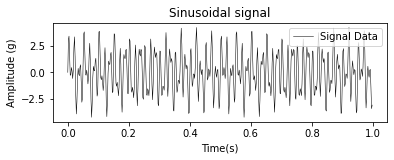

In [59]:
# Signal generation / import
#sampling Eg : 500 samples /sec = sampling a wave at 500Hz rate

Fs=500
# 0 to 1min, and sample size 1/Fs
t=np.arange(0,1,1/Fs)
#Signal frequency  = 20Hz
#f=20;

x=1*np.sin(2*pi*22*t)+2*np.sin(2*pi*60*t)+1.5*np.sin(2*pi*100*t)
plt.subplot(2,1,1)
plt.plot(t,fclean,color='k',Linewidth=0.5,label='Signal Data');plt.title('Sinusoidal signal');
plt.xlabel('Time(s)');plt.ylabel('Amplitude (g)');
plt.legend()


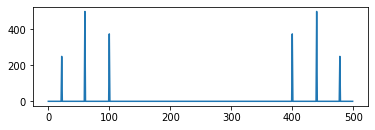

In [49]:
#computing FFT
X=fft(x)
plt.subplot(2,1,2)
plt.plot(abs(X))
#basic concept of tsp

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

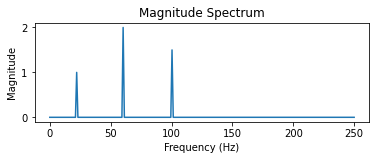

In [50]:
#generate Frequency 
n=np.size(t)
k=int(n/2)
fr=(Fs/2)*np.linspace(0,1,k)

x_m=(2/n)*abs(X[0:k])
plt.subplot(2,1,2)
plt.plot(fr,x_m)
plt.title('Magnitude Spectrum');
plt.xlabel('Frequency (Hz)');plt.ylabel('Magnitude');
plt.tight_layout

<ipython-input-61-10233746738e>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f,color='r',Linewidth=1,label='Noise')
<ipython-input-61-10233746738e>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,fclean,color='k',Linewidth=2,label='Clean');plt.title('Sinusoidal signal');


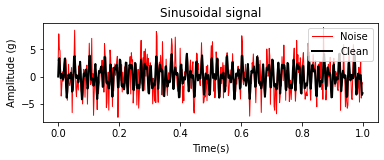

In [61]:
fclean = x
f = x+2.5*np.random.randn(len(t))
plt.subplot(2,1,1)
plt.plot(t,f,color='r',Linewidth=1,label='Noise')
plt.plot(t,fclean,color='k',Linewidth=2,label='Clean');plt.title('Sinusoidal signal');
plt.xlabel('Time(s)');plt.ylabel('Amplitude (g)');
plt.legend()

In [84]:
n=np.size(t)
#FFT
ftf=np.fft.fft(f,n)
#PSD
PSD = ftf*np.conj(ftf)/n
dt=1/Fs
print(dt)

0.002


In [85]:
#freq data
dd=np.arange(n)
ss=1/(dt*n)
freq=ss*dd

<ipython-input-86-f487bd45c989>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f,color='r',Linewidth=1,label='Noise')
<ipython-input-86-f487bd45c989>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,fclean,color='k',Linewidth=2,label='Clean')
<ipython-input-86-f487bd45c989>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L],PSD[L],color='c',Linewidth=2,label='PSD')
C:\Users\raoab\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.legend(*args, **kwargs)>

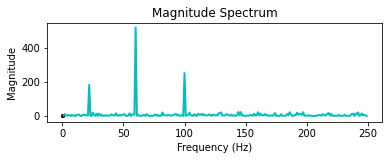

In [86]:
L = np.arange(1,np.floor(n/2),dtype='int')

plt.subplot(2,1,2)
plt.plot(t,f,color='r',Linewidth=1,label='Noise')
plt.plot(t,fclean,color='k',Linewidth=2,label='Clean')
plt.plot(freq[L],PSD[L],color='c',Linewidth=2,label='PSD') 
plt.title('Magnitude Spectrum');
plt.xlabel('Frequency (Hz)');plt.ylabel('Magnitude');
#plt.tight_layout
plt.legend     
# peaks represnet most of the power is contributed to it 

In [90]:
#now lets remove data below certain magnitude clean up the data and then use inverse FFT to denoise the signal and get a clean signal
indices=PSD>150 # find amplitude with power magnitude greater than 100
PSDclean=PSD*indices #zero out other power magnitude
ftf=indices*ftf # zero out small fouriwe co-eff
ffilt=np.fft.ifft(ftf)  #inversed fft for filtered data (signal with high power)

<ipython-input-93-3197d93efaf6>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f,color='r',Linewidth=1,label='Noise')
<ipython-input-93-3197d93efaf6>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,fclean,color='k',Linewidth=2,label='Clean')
<ipython-input-93-3197d93efaf6>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,ffilt,color='k',Linewidth=2,label='Filtered')
C:\Users\raoab\Anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-93-3197d93efaf6>:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support

<function matplotlib.pyplot.legend(*args, **kwargs)>

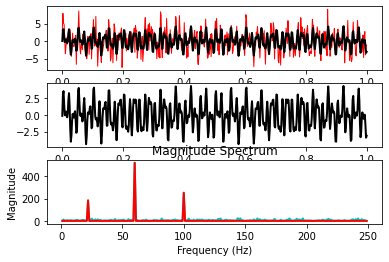

In [93]:
fig,axs=plt.subplots(3,1)
plt.sca(axs[0])

plt.plot(t,f,color='r',Linewidth=1,label='Noise')
plt.plot(t,fclean,color='k',Linewidth=2,label='Clean')
plt.legend 


plt.sca(axs[1])
plt.plot(t,ffilt,color='k',Linewidth=2,label='Filtered')
plt.legend 


plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='c',Linewidth=2,label='PSD_Noise') 
plt.plot(freq[L],PSDclean[L],color='r',Linewidth=2,label='PSD_filtered') 
plt.title('Magnitude Spectrum');
plt.xlabel('Frequency (Hz)');plt.ylabel('Magnitude');
#plt.tight_layout
plt.legend  